In [14]:

#https://www.fool.com/knowledge-center/difference-between-ratings-shares.aspx


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pycats
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11,8

tv = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-01-08/IMDb_Economist_tv_ratings.csv")

pd.set_option('display.max_columns', 10)



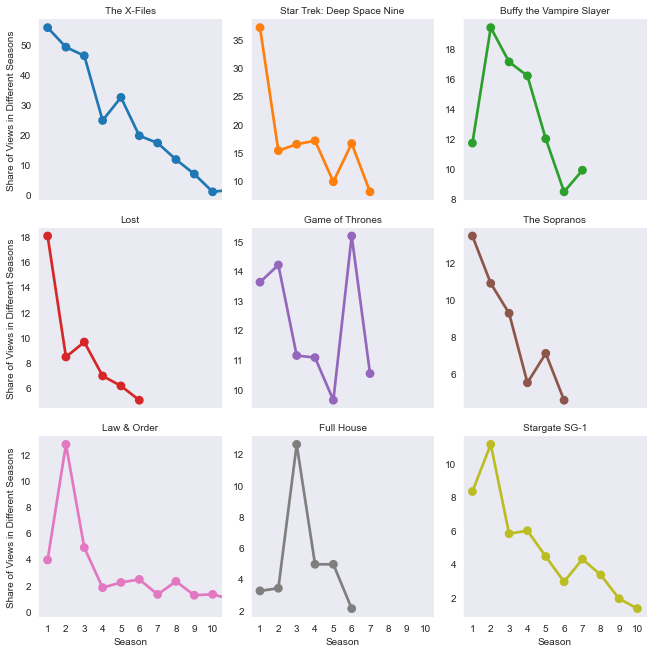

In [15]:

# =============================================================================
# 1 Getting shows with most number of seasons and looking at their trends.
# =============================================================================

#Getting shows with highest number of seasons
temp = tv.groupby("title")["title"].count()

#Getting the most viewed tv show season openings out of the shows whic have had at least 6 seasons.
shows = tv.loc[tv.title.isin(temp.loc[temp>=6].index)].sort_values("share", ascending = False).drop_duplicates(['title']).head(9)["title"].reset_index(drop = True)
trend = tv.loc[tv.title.isin(shows)][["title","seasonNumber","share"]].sort_values("share", ascending = False)

#Visualizing Trend of Shows with highest Share (At least 6 seasons aired)
g = sns.FacetGrid(trend, col="title", col_wrap=3, hue = "title", sharey=False)
g.map_dataframe(sns.pointplot, x="seasonNumber", y="share")
g.set_axis_labels("Season", "Share of Views in Different Seasons")
g.set_titles(col_template="{col_name}")
plt.show()



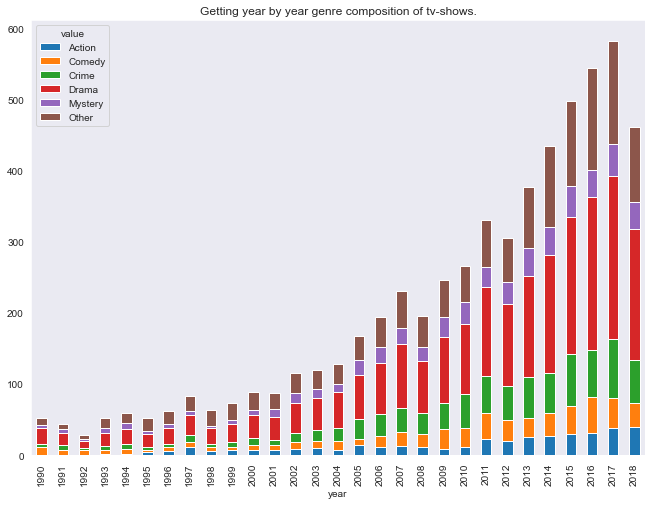

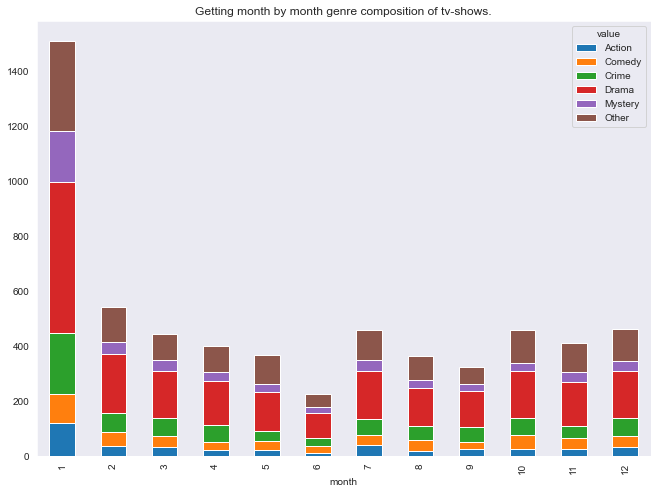

In [16]:
# =============================================================================
# 2 Getting Split of Genre in each year and month
# =============================================================================



tv["date"] = pd.to_datetime(tv["date"])
tv["year"] = tv["date"].dt.year
tv["month"] = tv["date"].dt.month

tv[["g1","g2","g3"]] = tv.genres.str.split(",", expand = True)

long_tv = pd.melt(tv, list(tv.columns[:-3]), ["g1","g2","g3"]).drop(columns = ["genres","variable"]).dropna()
temp = long_tv.copy()

long_tv["value"] = pycats.cat_lump(long_tv["value"].astype("category"),5)

sns.set_style("dark")
#Not a very reliable plot because each tv show had multiple categories due to which we don't get a clear idea of the percentage of genres made each year.
long_tv.groupby(["year","value"])["value"].count().unstack().plot(kind='bar', stacked=True)
plt.title("Getting year by year genre composition of tv-shows.")
plt.show()

long_tv.groupby(["month","value"])["value"].count().unstack().plot(kind='bar', stacked=True)
plt.title("Getting month by month genre composition of tv-shows.")
plt.show()
#We see that most of the shows aired in first month of each year i.e, January.



In [17]:

# =============================================================================
# 3 Best show for each genre by both average rating and share
# =============================================================================

cols = ["title","year","value","share","av_rating"]

print(temp[temp.groupby("value")["share"].transform('max') == temp["share"]][cols])
print("\n")
print(temp[temp.groupby("value")["av_rating"].transform('max') == temp["av_rating"]][cols])



                                title  year        value  share  av_rating
376                            Cheers  1992       Comedy  16.03     7.7525
1278                           Narcos  2015    Biography   1.52     8.7387
1667       Star Trek: Deep Space Nine  1993       Action  37.11     7.0936
2061                      The X-Files  1994        Drama  55.65     7.9288
2121                       Twin Peaks  1991        Crime  55.01     8.4187
2848                               ER  1995      Romance   6.08     7.9252
3225  Keeping Up with the Kardashians  2007   Reality-TV   0.02     4.4000
3553          Neon Genesis Evangelion  1996    Animation   5.92     8.2508
3750          Return to Lonesome Dove  1993      Western   1.02     8.9671
3909                            Smash  2012      Musical   0.21     7.9397
3933       Star Trek: Deep Space Nine  1993    Adventure  37.11     7.0936
4039                        The Bible  2013  Documentary   0.14     7.7113
4274                    T